In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
%matplotlib inline


In [78]:
df = pd.read_csv("data/weatherAUS.csv")
pd.set_option("display.max_columns", None)

In [79]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [80]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [81]:
num_var = [feature for feature in df.columns if df[feature].dtypes != '0']
discrete_var = [feature for feature in num_var if len(df[feature].unique())<=25]
cont_var = [feature for feature in num_var if feature not in discrete_var]
categ_var = [feature for feature in df.columns if feature not in num_var]

In [82]:
df[categ_var]

""
0
1
2
3
4
...
145455
145456
145457
145458


Handling Missing Values

In [83]:
df.isnull().sum()
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [84]:
def find_var_type(var):
    if var in discrete_var:
        print("{} is numerical variable,Discrete in nature".format(var))
    elif var in cont_var:
        print("{} is a Numerical Variable, Continuous in nature".format(var))
    else:
        print("{} is Categorical Variable".format(var))

In [85]:
find_var_type('Cloud3pm           ')

Cloud3pm            is Categorical Variable


In [86]:
def RandomSampleImputation(df, feature):
    df[feature]=df[feature]
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature]=random_sample

In [87]:
RandomSampleImputation(df,"Cloud9am")
RandomSampleImputation(df,"Cloud3pm")
RandomSampleImputation(df,"Evaporation")
RandomSampleImputation(df,"Sunshine")

In [88]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation       0.000000
Sunshine          0.000000
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [89]:
find_var_type('RainToday         ')

RainToday          is Categorical Variable


Then we will replace the null values of all the continuous feature which are having less number of null values

In [90]:
def MeanImputation(df, feature):
    df[feature] = df[feature]
    mean = df[feature].mean()
    df[feature] = df[feature].fillna(mean)

In [91]:
MeanImputation(df,'Pressure3pm')

In [92]:
MeanImputation(df,'Pressure9am')
MeanImputation(df,'MinTemp')
MeanImputation(df,'MaxTemp')
MeanImputation(df,'Rainfall')
MeanImputation(df,'WindGustSpeed')
MeanImputation(df,'WindSpeed9am')
MeanImputation(df,'WindSpeed3pm')
MeanImputation(df,'Pressure9am')
MeanImputation(df,'Humidity9am')
MeanImputation(df,'Humidity3pm')
MeanImputation(df,'Temp3pm')
MeanImputation(df,'Temp9am')

In [93]:
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

Now we are left with the categorical variables only, for these variables we will replace null values later in the Label Encoding part.

PLOTTING A HEATMAP

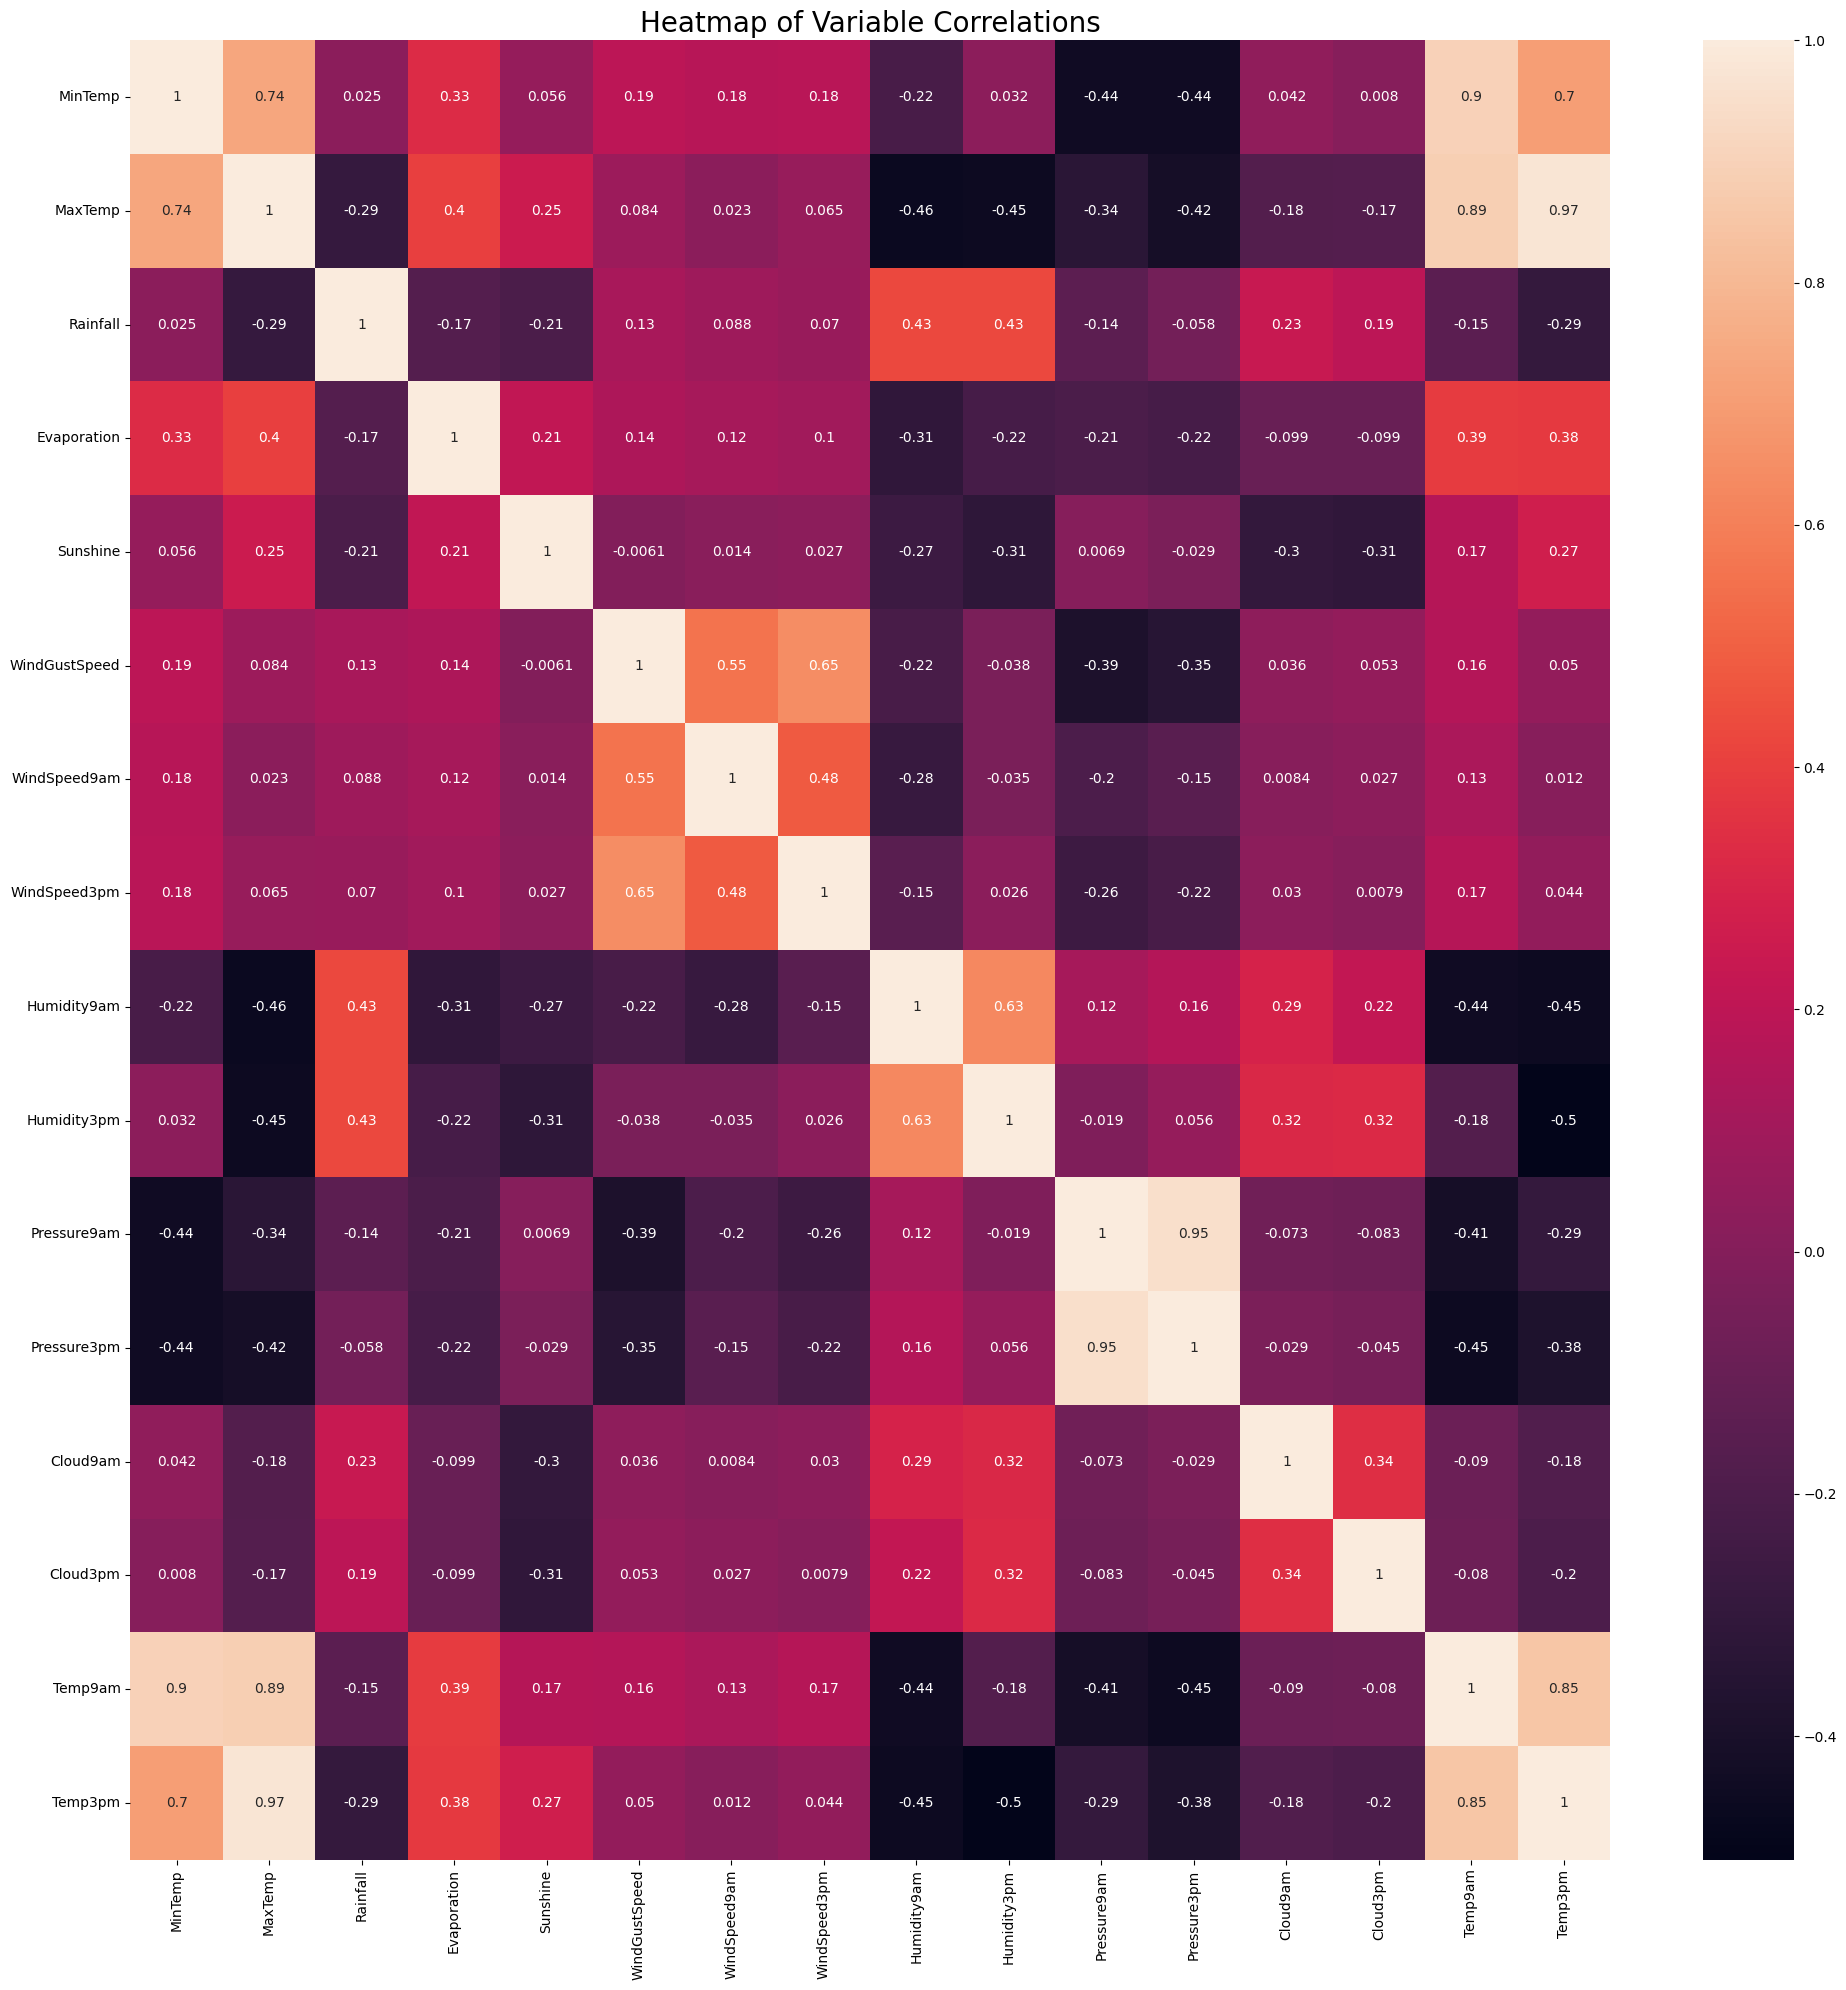

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate Spearman correlation on numeric columns only
corrmat = numeric_df.corr(method="spearman")

# Plot the heatmap
plt.figure(figsize=(20,20))
g = sns.heatmap(corrmat, annot=True)
plt.title('Heatmap of Variable Correlations', fontsize=20)
# Fixing any display issues with the plot, such as cut-off edges
plt.tight_layout()
plt.show()


Analysis for Continuous variables

Skipping non-numeric feature: Date
Skipping non-numeric feature: Location


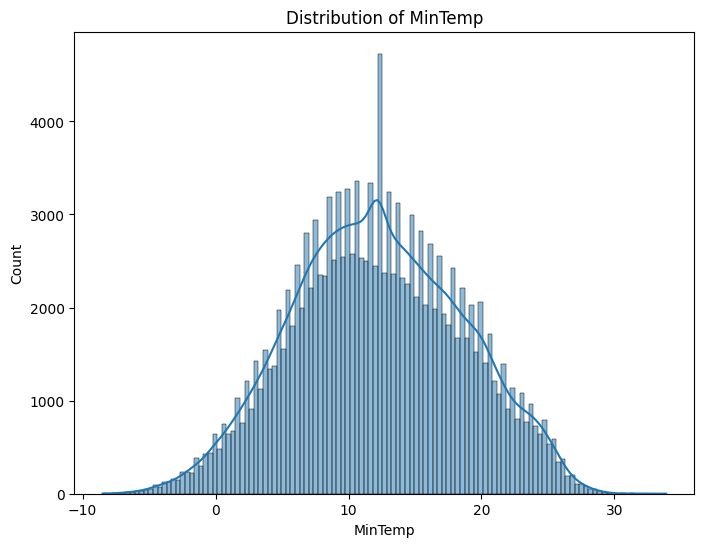

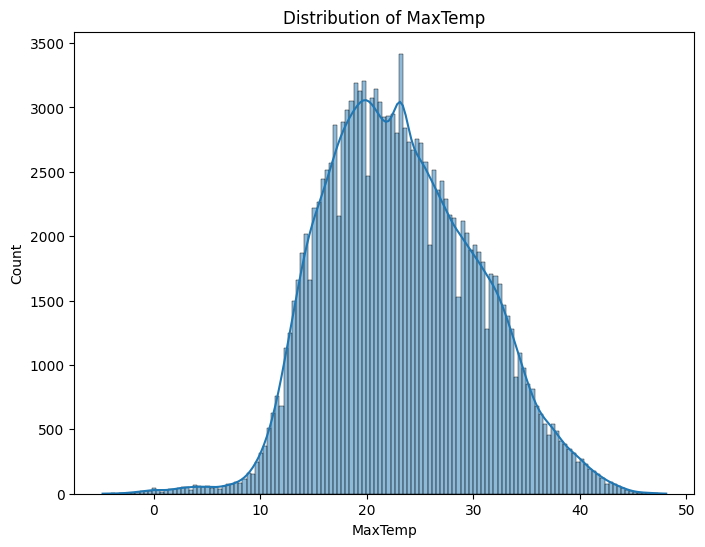

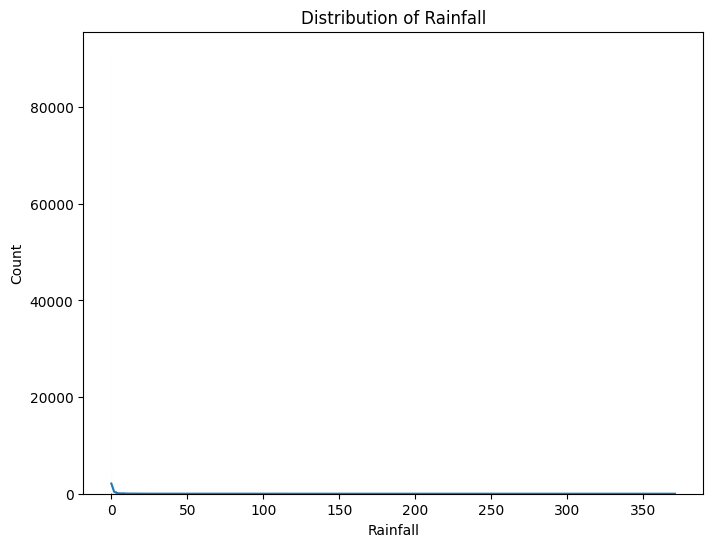

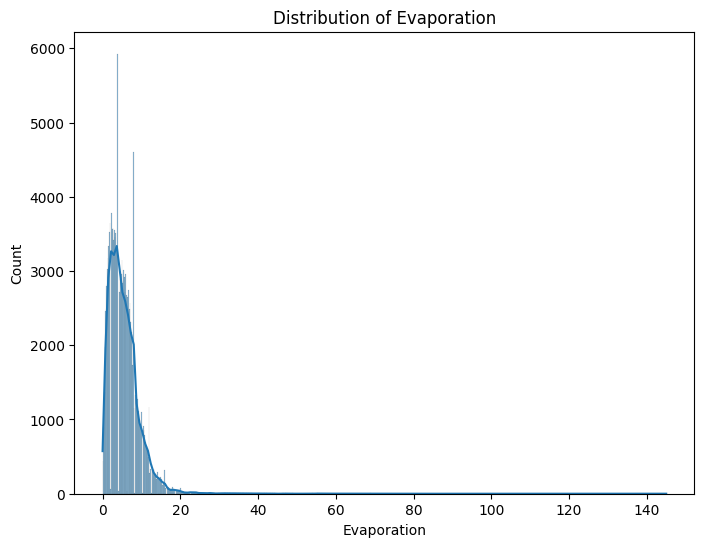

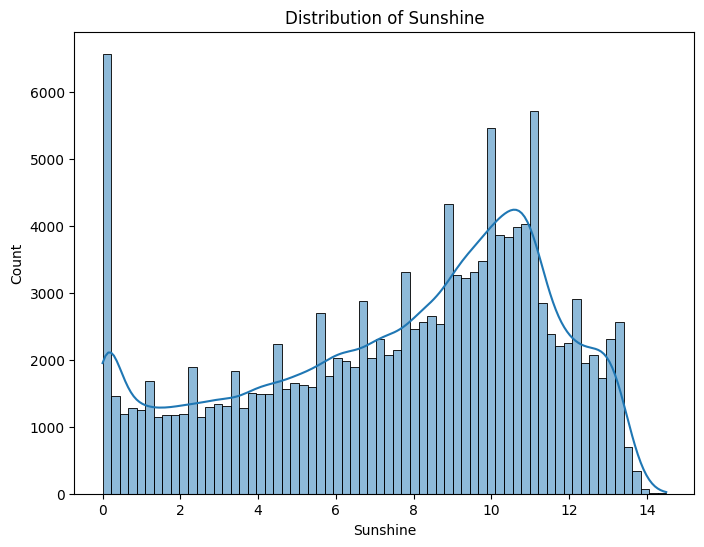

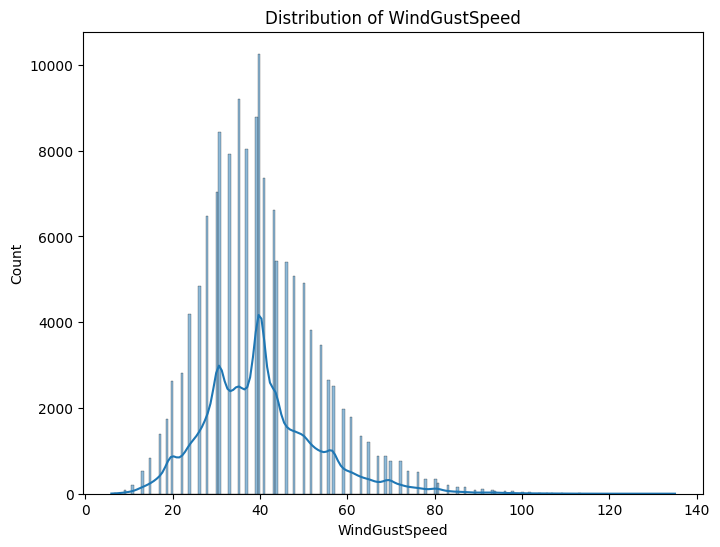

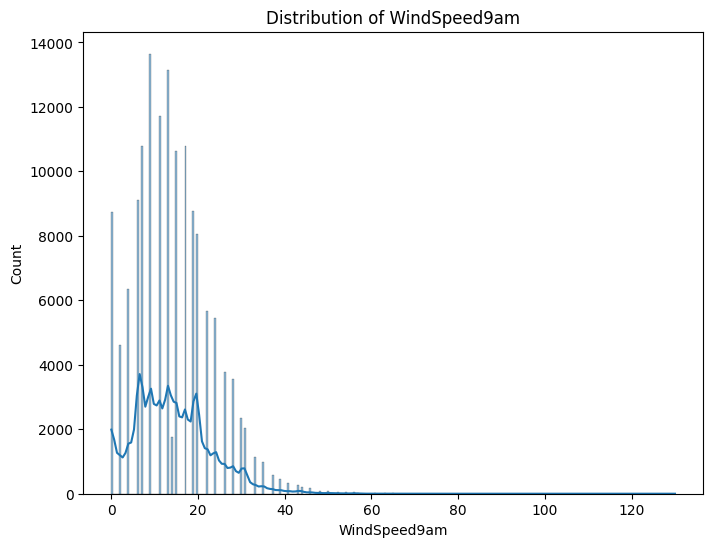

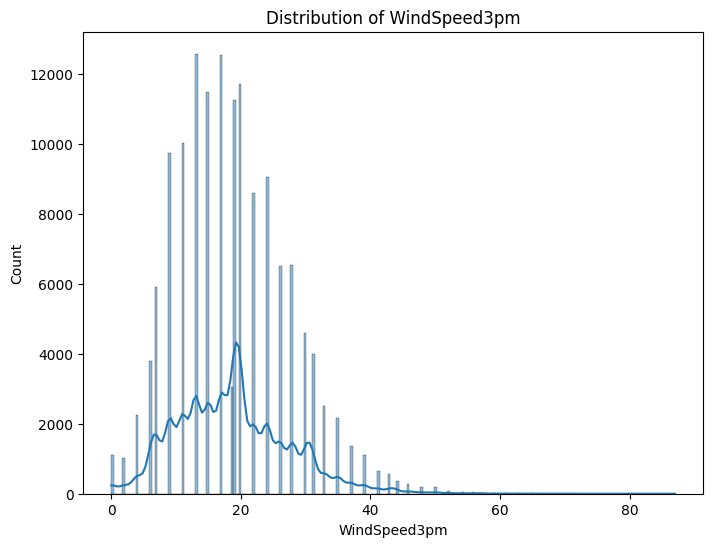

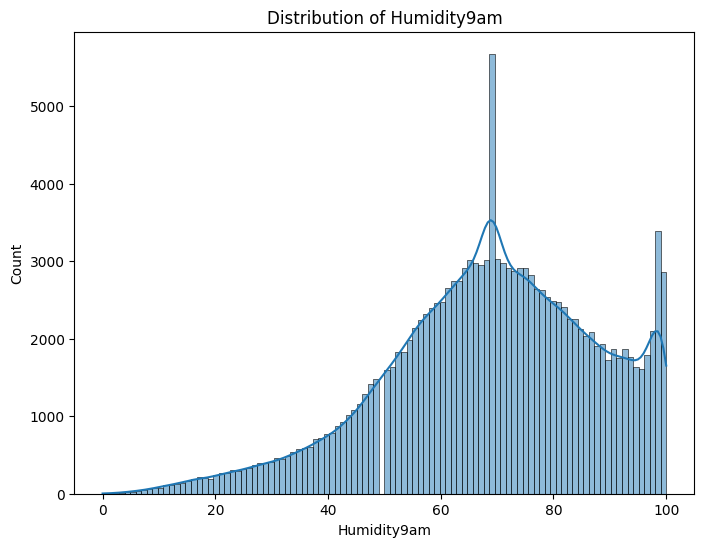

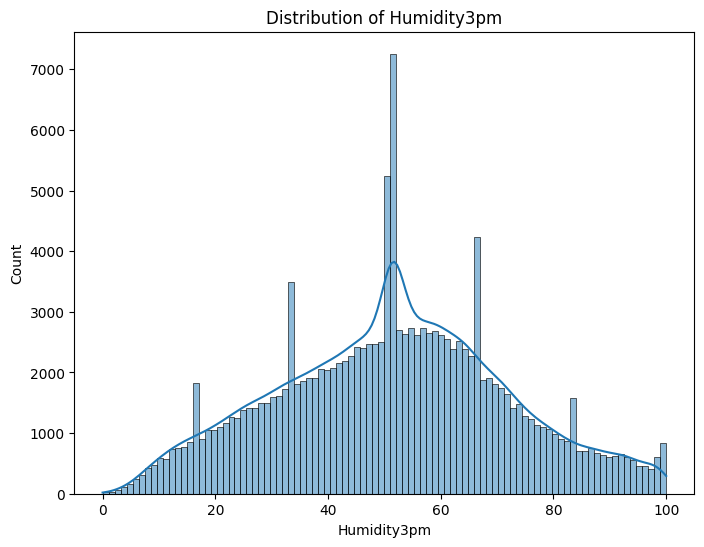

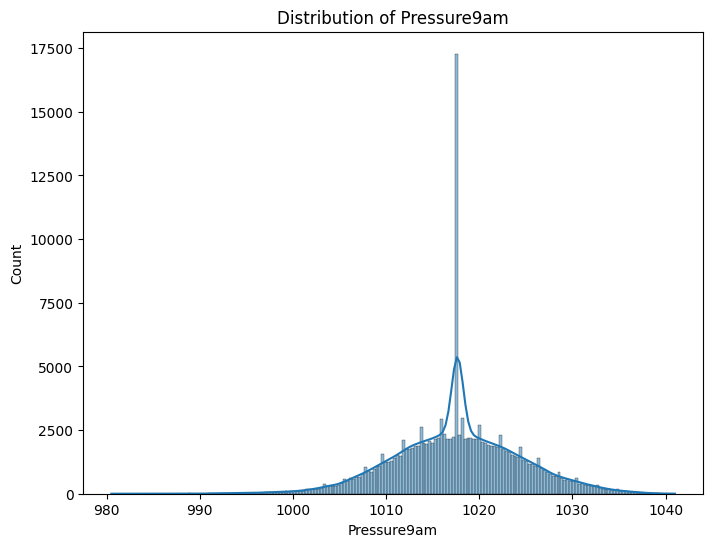

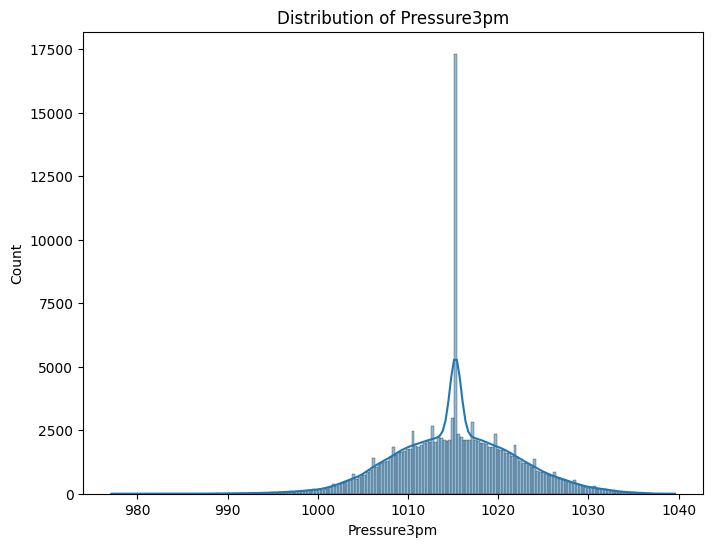

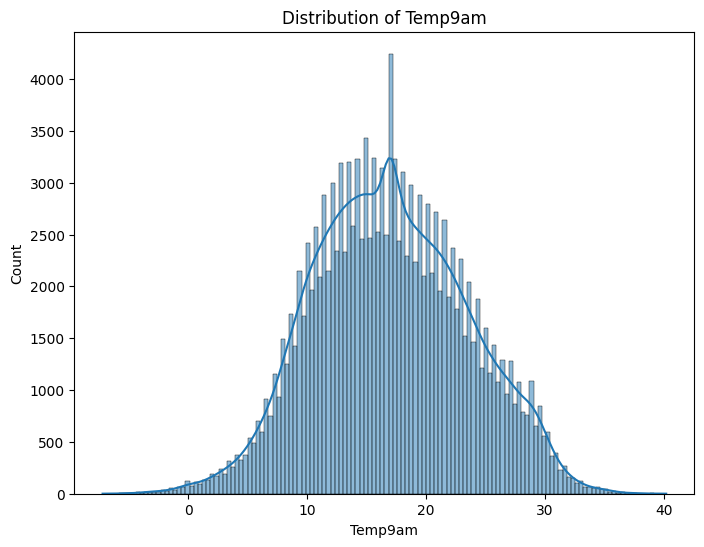

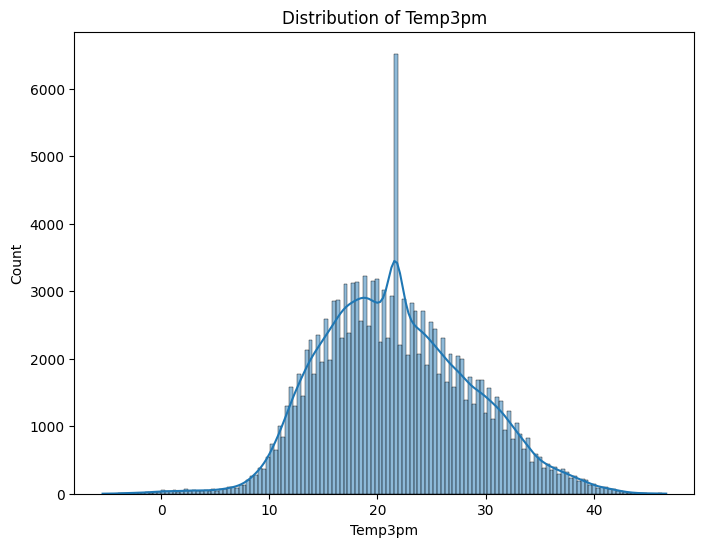

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# cont_var should be a list of your continuous variable names.
for feature in cont_var:
    data = df.copy()
    
    # Skip non-numeric features
    if not np.issubdtype(data[feature].dtype, np.number):
        print(f"Skipping non-numeric feature: {feature}")
        continue
    
    # Set the figure size before plotting
    plt.figure(figsize=(8, 6))
    
    # Use histplot (with KDE) to plot the distribution of the feature
    sns.histplot(data[feature], kde=True)
    
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"Distribution of {feature}")
    
    # Show the plot
    plt.show()


Skipping non-numeric feature: Date
Skipping non-numeric feature: Location


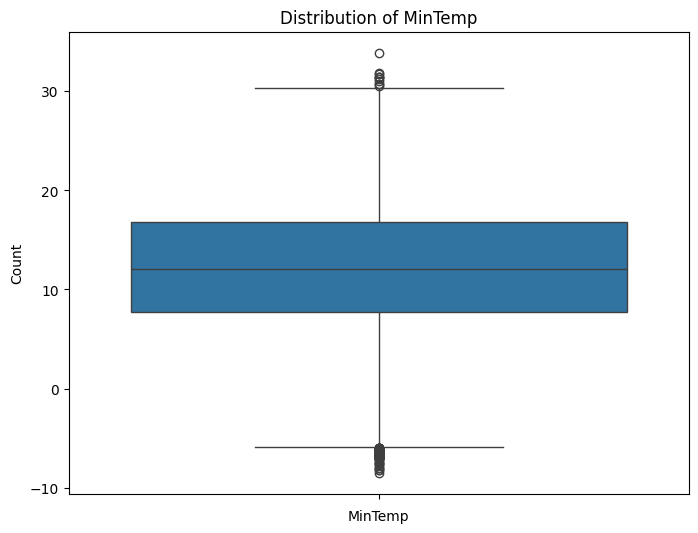

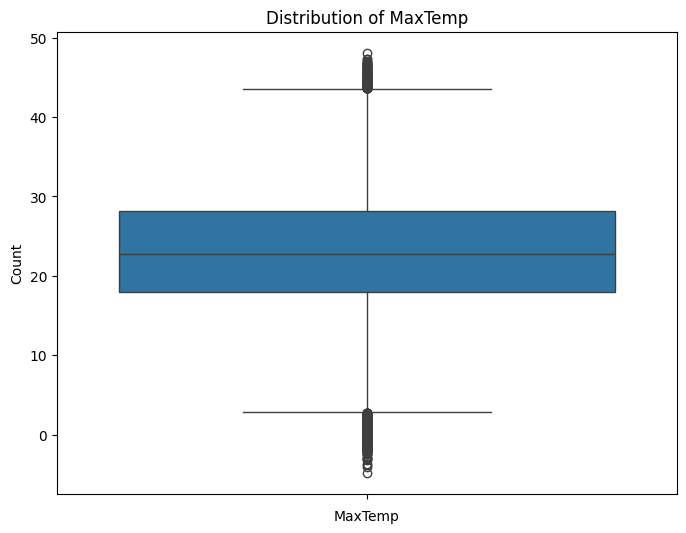

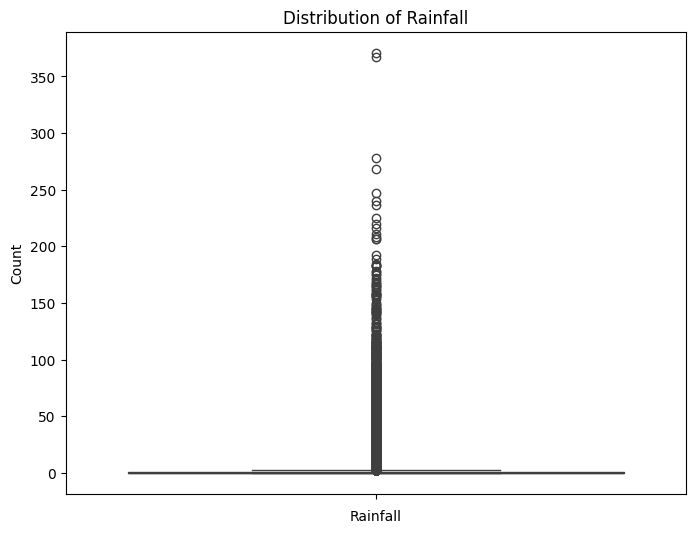

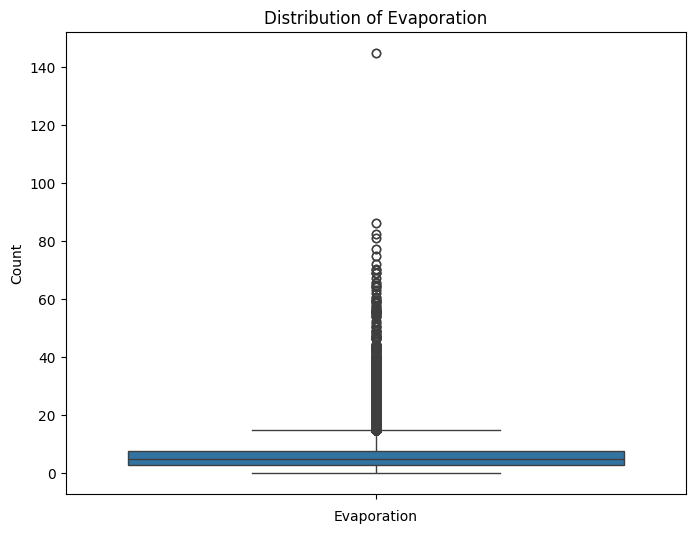

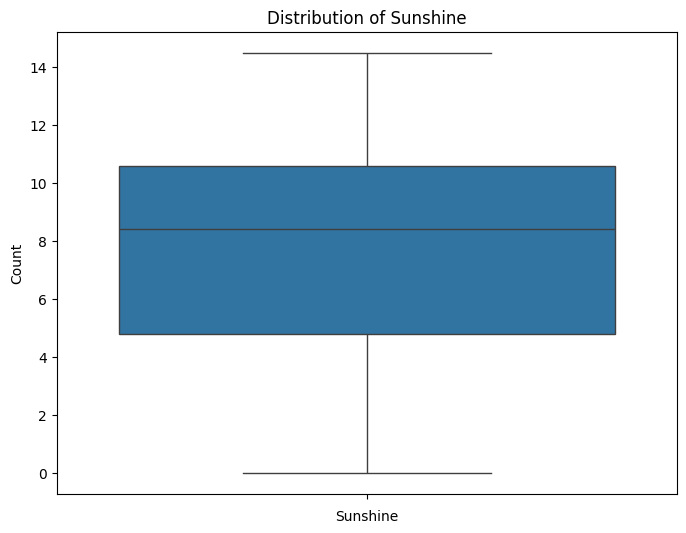

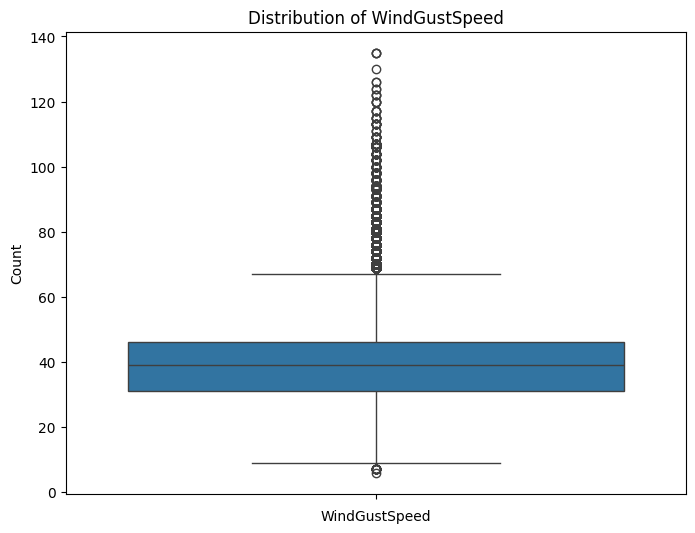

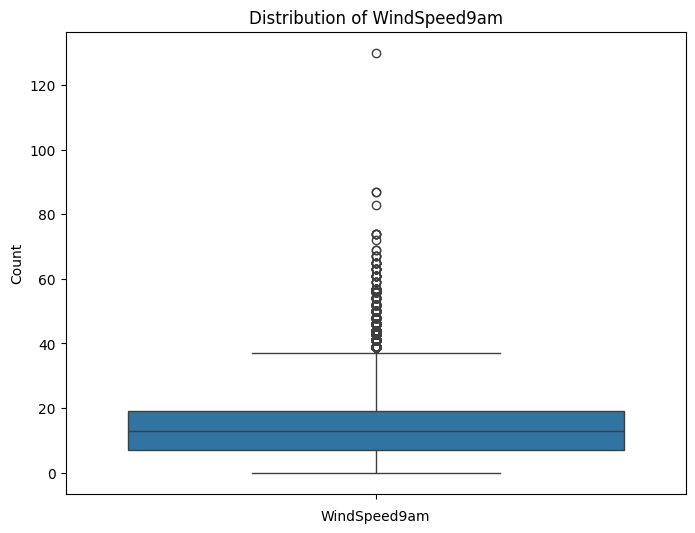

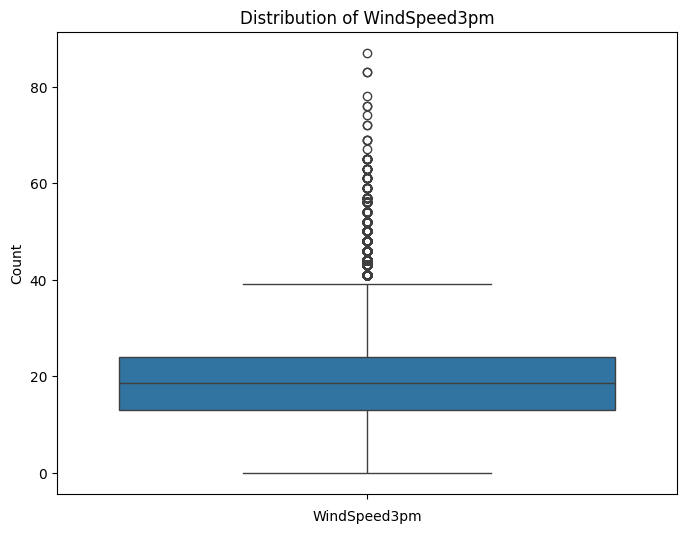

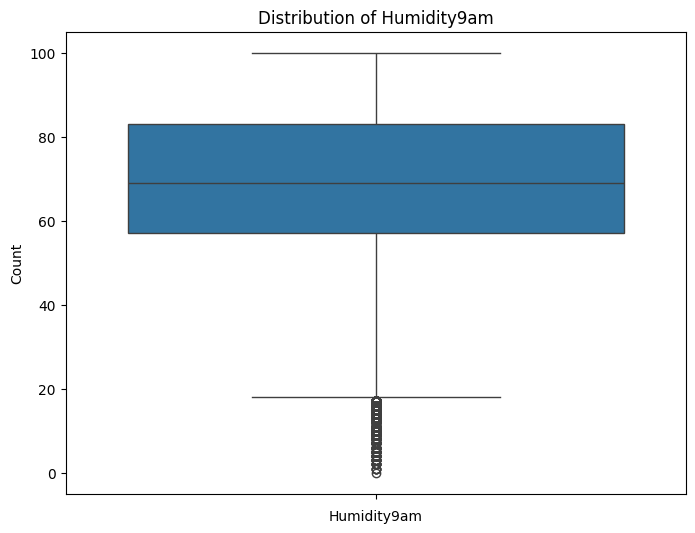

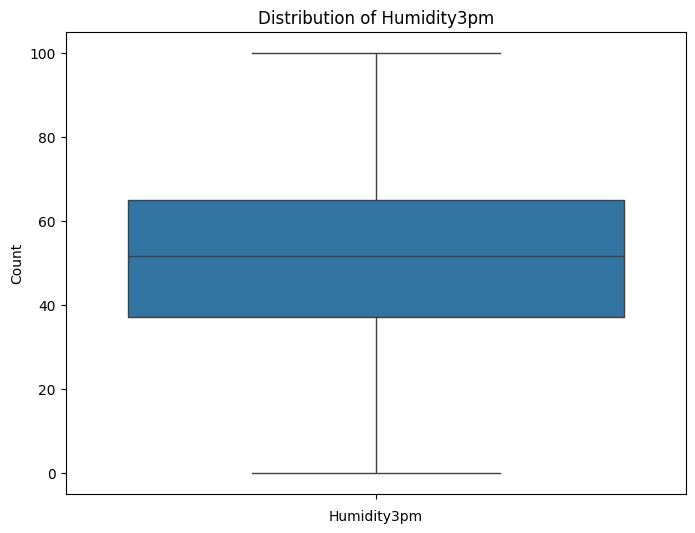

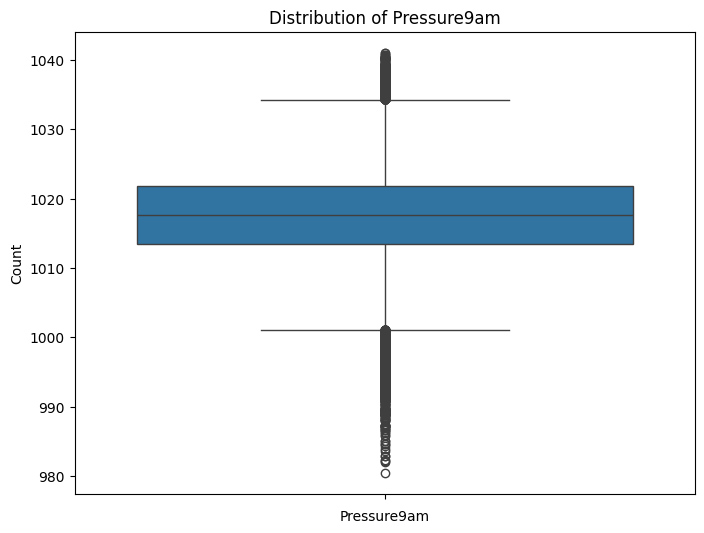

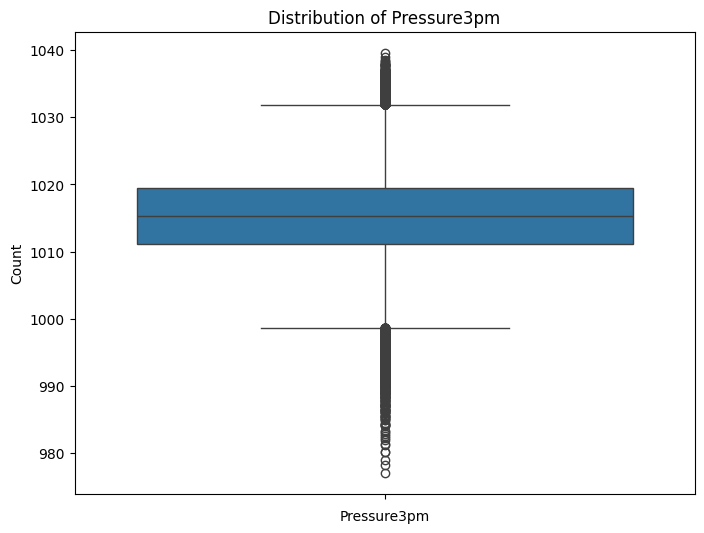

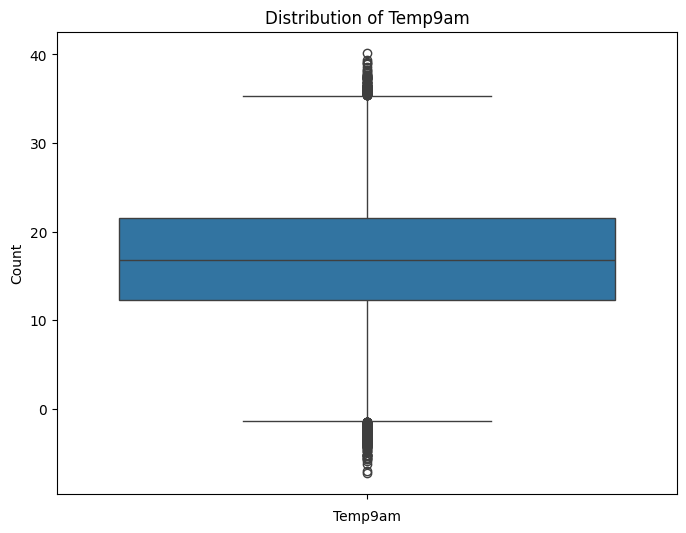

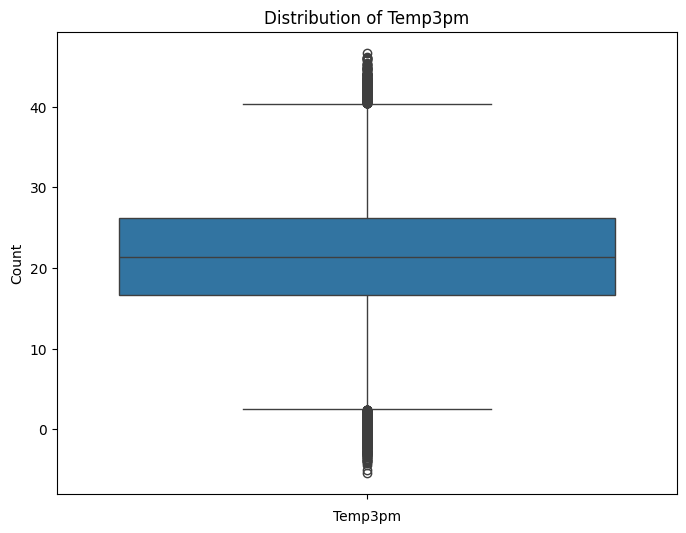

In [96]:
for feature in cont_var:
    data = df.copy()

    # Skip non-numeric features
    if not np.issubdtype(data[feature].dtype, np.number):
        print(f"Skipping non-numeric feature: {feature}")
        continue
    
    # Set the figure size before plotting
    plt.figure(figsize=(8, 6))
    
    # Use histplot (with KDE) to plot the distribution of the feature
    sns.boxplot(data[feature])
    
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"Distribution of {feature}")
    
    # Show the plot
    plt.show()

One Hot Encoding

In [97]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [98]:
df["RainToday"] = pd.get_dummies(df["RainToday"],drop_first=True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"],drop_first=True)
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,2.4,8.3,W,44.00000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,False,False
1,2008-12-02,Albury,7.4,25.100000,0.0,3.6,10.0,WNW,44.00000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,False,False
2,2008-12-03,Albury,12.9,25.700000,0.0,2.6,4.4,WSW,46.00000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,False,False
3,2008-12-04,Albury,9.2,28.000000,0.0,18.4,8.9,NE,24.00000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,False,False
4,2008-12-05,Albury,17.5,32.300000,1.0,5.4,3.0,W,41.00000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,1.4,7.8,E,31.00000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,False,False
145456,2017-06-22,Uluru,3.6,25.300000,0.0,7.6,13.5,NNW,22.00000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,False,False
145457,2017-06-23,Uluru,5.4,26.900000,0.0,6.8,11.0,N,37.00000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,False,False
145458,2017-06-24,Uluru,7.8,27.000000,0.0,2.6,13.2,SE,28.00000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,False,False


Lable Encoding

In [101]:
for feature in categ_var:
    print(feature,(df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)